# Priors

In [1]:
from binary_tools.priors.priors import*

In this file there are a series of functions that calculate the probability of initial conditions on a binary system.

The first part contains a few default functions that are used throughout the rest of the code. The first relates to a conventional scaled mass, $M^\alpha$, and the second relates to a log base 10 scaled mass, $10^{M(1-\alpha)}$

In [2]:
print(default_function(55,2.3),default_function_log(1.4,0))

9.934952937338564e-05 25.118864315095795


The second part of this file contains a series of probabilities for the initial conditions on a binary system. The first is for the mass in kg, the second for log base 10 of the mass, the third is for the ratio of two masses in a binary system, and the fourth is for the log base 10 of the period. These functions accept a distribution, but if one is not provided, the default distributions are used.

In [3]:
prob_mass(3,10,1,100,alpha=2.3,f_M=default_function)

0.19009981689625488

The third part of the file has the first set of random fuctions calculated through the Montecarlo sampling method and drawing a random number from an array of possibilities using a given distribution f_M.

In [5]:
rand_mass(1,100,alpha=2.3,f_M=default_function)

2.551981854867576

The fourth part contains the second set of random functions calculated through the Montecarlo 
method of using the cumulative distribution function and finding the inverse.

In [6]:
rand_mass_cdf(1,100,alpha=2.3,f_M=default_function)

1.2187254640604952

The fifth and final part of the file contains tests for the probability functions and the random functions. These tests are similar to the histogram tests in the test_kicks file.

These histogram based tests works by first creating a array of values containing outputs from the function being tested.               That array is then used in the numpy.histogram function. 

In order to check that the random functions are producing the distributions expected of them, the values of the histogram need to be conpared to the expected values directly calulated by the distribution. The equations of the cumulative distribution function of these distributions are as follows,

mass: $f(x) = ((1-\alpha)mass+M_{low}(1-\alpha))^{1/(1-\alpha)}$

mass log: $f(x) = \frac{\log_{10}((1-\alpha)\log_{10}(10)mass_{log}+10^{(1-\alpha)M_{low}})}{1-\alpha}$

ratio: $f(x) = ((1-\alpha)mass+R_{low}(1-\alpha))^{1/(1-\alpha)}$

period log: $f(x) = \frac{\log_{10}((1-\alpha)\log_{10}(10)mass_{log}+10^{(1-\alpha)P_{low}})}{1-\alpha}$

Where $M_{low}$, $R_{low}$, and $P_{low}$ are the lower bounds of the distribution

By evaluating the cdf of the distributions from one bin to the next, the expected probability of the bin was found. That probability was multiplied by the number of points in a new test array so the difference in the values between the expected output, and the function output calculated previously, could be compaired on a graph. 

In order to numerically compare the expected probability to the function probability, each value from the function histogram was first divided by the sum of all the values to obtain the probability of each bin. Then the difference between the expected probability and the function probability was compared to a given tolerance to see if the test would pass.

    success = True
    tolerance = max(vals)*tolerance
    for k in range(0,len(vals)):
        prob_hist = vals[k]/(sum(vals))
        if abs(prob_test[k]-prob_hist)>tolerance:
            success = False
            break

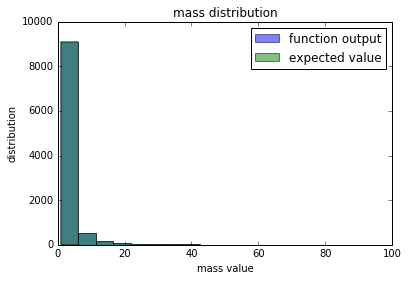

True

In [7]:
test_rand_mass(1,100,num_sample=10000, nbins=20, tolerance = 1e-3, seed="Feyra", cdf=True,\
               plot=True, save=False)

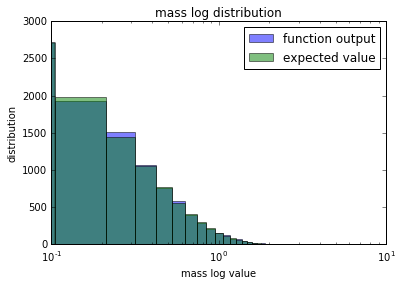

True

In [8]:
test_rand_mass_log(0,2,num_sample=10000, nbins=20, tolerance = 1e-3, seed="Stewart",\
                   cdf=True, plot=True, save=False)

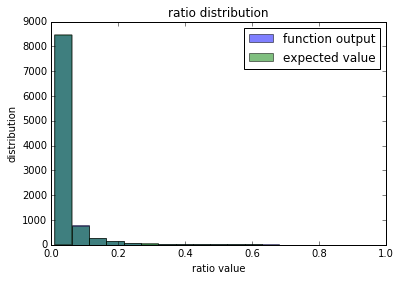

True

In [9]:
test_rand_ratio(0.01, 0.99, test_alpha=2, num_sample=10000, nbins=20, tolerance = 1e-3,\
                seed="Lee", cdf=True, plot=True, save=False)

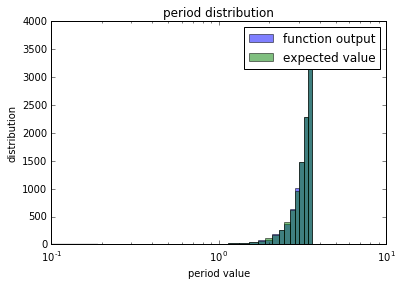

True

In [10]:
test_rand_period_log(0,3.6,test_alpha=0,num_sample=10000,nbins=20,tolerance = 1e-3,\
                     seed="Hardy",cdf=True,plot=True,save=False)